# Forecasting Non-Performing Loans (NPLs)

### Importing Dependencies

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
df=pd.read_csv(Path('./Data/df.csv'))
df.head()

,DATE,GDP,WTI,U_RATE,X_RATE,CPI,CR_GROWTH,NPL,M2,N_RESV,N_GAS,O_PROD,CEM_SALES,WA_LR,PRIME
0,Mar-95,2.4,18.4,18.1,5.9468,31.3000,7072.3,9.0,9986.7,338.5,1915.9,392.5,60432.0,13.4,16.0
1,Jun-95,4.9,19.4,16.5,5.9466,31.8667,7188.8,9.9,9934.4,358.9,1978.9,398.1,75047.0,13.3,15.0
2,Sep-95,3.6,17.8,17.8,5.9240,32.2333,7169.1,9.4,9885.9,360.0,1884.7,389.9,65952.0,13.3,15.0
3,Dec-95,4.2,18.2,16.3,5.9694,32.4000,7188.3,10.2,10453.0,346.2,1987.0,387.1,64243.0,13.0,14.0
4,Mar-96,4.2,19.8,17.1,5.9995,32.4333,7249.7,10.9,9944.2,331.2,2195.6,398.4,62956.0,13.3,15.5


In [3]:
import seaborn as sns

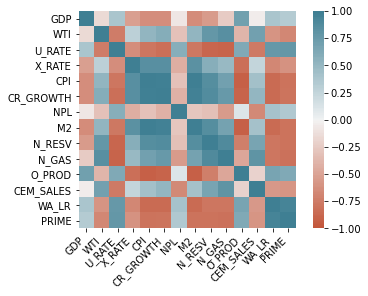

In [4]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [5]:
df.corr()

,GDP,WTI,U_RATE,X_RATE,CPI,CR_GROWTH,NPL,M2,N_RESV,N_GAS,O_PROD,CEM_SALES,WA_LR,PRIME
GDP,1.000000,-0.154950,0.392182,-0.524561,-0.636485,-0.631087,-0.075548,-0.647044,-0.546367,-0.247251,0.718211,-0.036961,0.391775,0.331499
WTI,-0.154950,1.000000,-0.735117,0.293952,0.530538,0.590138,-0.301137,0.530255,0.788523,0.847394,-0.375337,0.700569,-0.592826,-0.664488
U_RATE,0.392182,-0.735117,1.000000,-0.634439,-0.785473,-0.825365,0.578168,-0.771119,-0.875774,-0.892714,0.619550,-0.755225,0.770751,0.779620
X_RATE,-0.524561,0.293952,-0.634439,1.000000,0.852858,0.846680,-0.432810,0.834105,0.581959,0.486106,-0.827361,0.257170,-0.679172,-0.607722
CPI,-0.636485,0.530538,-0.785473,0.852858,1.000000,0.982282,-0.308978,0.996990,0.862597,0.696633,-0.927072,0.434183,-0.854317,-0.802931
CR_GROWTH,-0.631087,0.590138,-0.825365,0.846680,0.982282,1.000000,-0.399393,0.976350,0.882271,0.762525,-0.888413,0.508914,-0.853463,-0.793988
NPL,-0.075548,-0.301137,0.578168,-0.432810,-0.308978,-0.399393,1.000000,-0.274860,-0.316535,-0.544567,0.110140,-0.656841,0.419441,0.365770
M2,-0.647044,0.530255,-0.771119,0.834105,0.996990,0.976350,-0.274860,1.000000,0.863595,0.682426,-0.927766,0.426443,-0.849690,-0.799315
N_RESV,-0.546367,0.788523,-0.875774,0.581959,0.862597,0.882271,-0.316535,0.863595,1.000000,0.889337,-0.720085,0.676025,-0.784521,-0.801036
N_GAS,-0.247251,0.847394,-0.892714,0.486106,0.696633,0.762525,-0.544567,0.682426,0.889337,1.000000,-0.473016,0.809666,-0.783892,-0.817917


### Developing Model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Based on the correlation matrix in NLP_Forecast1.ipynb we will go with the following variables first

In [28]:
# X=df[['GDP', 'U_RATE', 'CPI', 'CR_GROWTH', 'M2', 'O_PROD', 'CEM_SALES', 'N_GAS', 'X_RATE', 'N_RESV', 'WTI', 'WA_LR', 'PRIME']]
# X=df[['GDP', 'U_RATE', 'CR_GROWTH', 'M2', 'O_PROD', 'CEM_SALES', 'N_GAS', 'X_RATE', 'N_RESV', 'WTI', 'WA_LR', 'PRIME']]
# X=df[['GDP', 'U_RATE', 'CR_GROWTH', 'M2', 'O_PROD', 'CEM_SALES', 'X_RATE', 'N_RESV', 'WTI', 'WA_LR', 'PRIME']]
# X=df[['GDP', 'U_RATE', 'CR_GROWTH', 'M2', 'O_PROD', 'CEM_SALES', 'X_RATE', 'WTI', 'WA_LR', 'PRIME']]
# X=df[['GDP', 'U_RATE', 'CR_GROWTH', 'M2', 'CEM_SALES', 'X_RATE', 'WTI', 'WA_LR', 'PRIME']]
X=df[['GDP', 'U_RATE', 'CR_GROWTH', 'M2', 'CEM_SALES', 'X_RATE', 'WTI', 'WA_LR']]
# X=df[['GDP', 'U_RATE', 'M2', 'CEM_SALES', 'X_RATE', 'WTI', 'WA_LR']]


# X=df[['GDP']].values.reshape(-1, 1)
# X=df[['GDP', 'CEM_SALES', 'CPI']]
y=df['NPL']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Scaling the Data

In [30]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_scaler=scaler.fit(X_train)

X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

In [31]:
model=LinearRegression()

In [32]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [33]:
y_pred=model.predict(X_test_scaled)

### Testing Model

In [13]:
# Import Dependencies
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [34]:
results=OLS(y_train, add_constant(X_train_scaled)).fit()

In [35]:
variables=results.model.exog

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NPL   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     31.32
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           7.65e-19
Time:                        15:59:07   Log-Likelihood:                -98.685
No. Observations:                  70   AIC:                             215.4
Df Residuals:                      61   BIC:                             235.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2414      0.127     33.431      0.000       3.988       4.495
x1            -0.6285      0.217     -2.901      0.005      -1.062      -0.195
x2             0.5043      0.329      1.534      0.130      -0.153       1.162
x3            -3.2722      0.882     -3.711      0.000      -5.035      -1.509
x4             3.9752      0.697      5.704      0.000       2.582       5.369
x5            -1.1586      0.265     -4.370      0.000      -1.689      -0.628
x6            -1.2591      0.315     -3.993      0.000      -1.890      -0.629
x7             0.9414      0.215      4.376      0.000       0.511       1.372
x8             0.4118      0.275      1.498      0.139      -0.138       0.961
==============================================================================
Omnibus:                        0.255   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.252
Skew:                           0.133   Prob(JB):                        0.882
Kurtosis:                       2.874   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Diagnostics

#### Linearity

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
y_pred_train=results.predict()

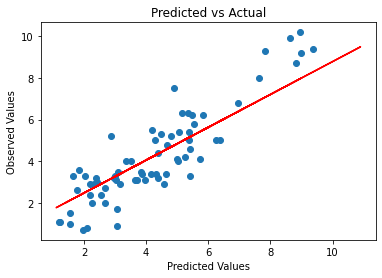

In [38]:
plt.plot(y_pred_train, y_train, 'o')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
m, b = np.polyfit(y_test, y_pred, 1)
g=plt.plot(y_test, m*y_test+b, color='red')


g

#### Normality of Error Terms

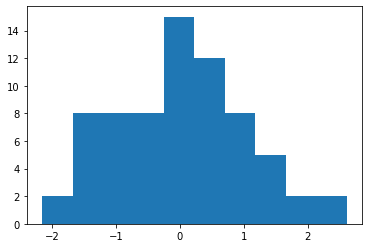

In [39]:
plt.hist(results.resid)
plt.show()

In [40]:
from scipy.stats import shapiro
stat, p = shapiro(results.resid)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.992, p=0.931


#### Multicollinearity Among Predictors

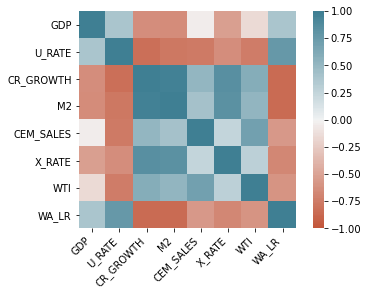

In [41]:
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
list1=X.columns
list2=['CONST']
list2.extend(list1)
print(list2)

['CONST', 'GDP', 'U_RATE', 'CR_GROWTH', 'M2', 'CEM_SALES', 'X_RATE', 'WTI', 'WA_LR']


In [43]:
vif_data = pd.DataFrame()
# vif_data['feature']=X.columns.values
vif_data['feature']=list2
vif_data['VIF']=[variance_inflation_factor(variables, i) for i in range((variables.shape[1]))]
# vif_data['VIF']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

     feature        VIF
0      CONST   1.000000
1        GDP   2.916651
2     U_RATE   6.713878
3  CR_GROWTH  48.307221
4         M2  30.174552
5  CEM_SALES   4.367838
6     X_RATE   6.177188
7        WTI   2.875861
8      WA_LR   4.694951


### Testing for No Autocorrelation in Errors

#### Observing the Durbin-Watson Statistic

#### Homoscedasticity

In [44]:
import statsmodels.stats.api as sms
test=sms.het_breuschpagan(results.resid, results.model.exog)
print(test)

(13.413977815410345, 0.09837756628003448, 1.8075414544752837, 0.09294276917821837)


#### Calculating Mean Squared Error for Multivariate Linear Regression Model NPLs

In [45]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

1.1614401391001674
